# Parcial 3: 
### Curso: Metodos computacionales 
### Profesor: Hernán David Salinas Jiménez


La entrega del examen se debe realizar a traves del git-hub en el directorio de cada estudiante.






**Ecuaciones diferenciales**


### Body Planet Orbits

1. (33%) Newton’s explanation of the motion of the planets in terms of a universal law of gravitation is one of the great achievements of science. He was able to prove that the planets traveled along elliptical paths with the sun at one focus and to predict periods of the motion accurately. All Newton needed to postulate was that the force between a planet of mass $m$ and the sun of mass $M$ is

\begin{equation}
F^{(g)} = -\frac{GmM}{r^2}
\end{equation}

Here $r$ is the planet-CM distance, $G$ is the universal gravitational constant, and the attractive force lies along the line connecting the planet and the sun. The hard part for Newton was solving the resulting differential equations because he had to invent calculus to do it and then had go through numerous analytic manipulations. The numerical solution is straightforward since even for planets the equation of motion is still

\begin{equation}
\vec{f}=m\vec{a} = m \frac{\mathrm{d}^2\vec{r}}{\mathrm{d}t^2}
\end{equation}

with the force having components:

\begin{equation}
f_x  = F^{(g)}\cos \theta =  F^{(g)}\frac{x}{r}
\end{equation}


\begin{equation}
f_y  = F^{(g)}\sin \theta =  F^{(g)}\frac{y}{r}
\end{equation}

where 

\begin{equation}
r=\sqrt{x^2+y^2}
\end{equation}



The equation of motion yields two simultaneous second-order ODEs:

\begin{equation}
\frac{\mathrm{d}^2x}{\mathrm{d}t^2}=-GM \frac{x}{r^3}
\end{equation}

\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2}=-GM \frac{y}{r^3}
\end{equation}


a. Solve the diferential equation with the next parameter:

Assume units such that GM = 1 and use the initial conditions x(0) = 0.5, y(0) = 0, vx(0) = 0.0, vy(0) = 1.63.

b. Realice a graph kind subplot with 1 row and 2 columns: in the first subplot include the graph: x vs t, y vs t and the second graph y vs x,  what is the conclusion of this results?.



In [62]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg 
import scipy as sc
from scipy.integrate import odeint

In [46]:
def Func_vect(R_vect,t,params):
  
  GM = params[0]

  x, y, x_dot, y_dot = R_vect

  vx = x_dot
  dvxdt = - (GM*x)/((x**2 + y**2)**1.5)
  
  vy = y_dot
  dvydt = - (GM*y)/((x**2 + y**2)**1.5)
  
  return np.array([vx, vy ,dvxdt,dvydt])


def solve_ode(t,initial_state,params):

  initial_state=np.array([x0,y0,vx0,vy0]) 

  t=np.linspace(0,10,100)

  sol = odeint(Func_vect,initial_state,t,args=(params,))

  return sol




'\ndef fun(Y,t,params)   :   \n  m=params[0]\n  k=params[1]         \n  omega_sq=k/m\n  dxdt=Y[1]\n  dvdt=-omega_sq*Y[0]\n  return np.array([dxdt,dvdt])\n\n\n\n\ndef solve_ode(t,x0,v0,params):\n  Y0=np.array([x0,v0]) \n  sol=sc.integrate.odeint(fun,Y0,t,args=(params,))\n  return sol\n'

In [47]:

# Parametros iniciales
x0 = 0.5
y0 = 0.0
vx0 = 0.0
vy0 = 1.63
initial_state=np.array([x0,y0,vx0,vy0])
GM = 1

t=np.linspace(0,10,100)

params = (GM,)


sol =solve_ode(t,initial_state,params)
np.shape(sol)




(100, 4)

In [48]:
X   = sol.T[0]
Y   = sol.T[1]
V_x = sol.T[2]
V_y = sol.T[3]


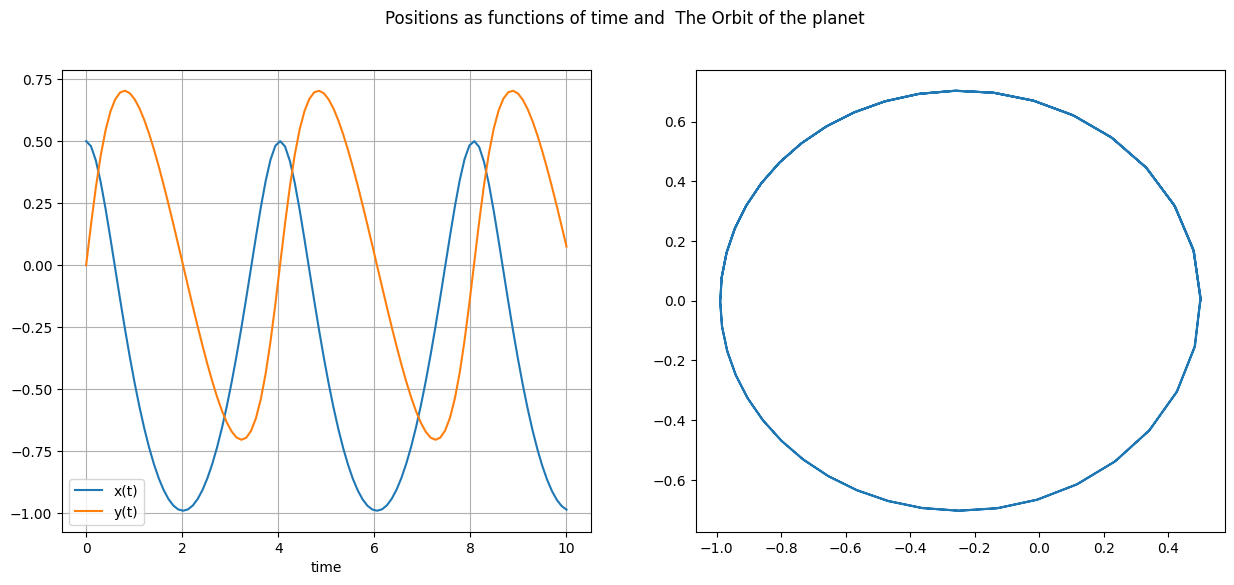

In [57]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,6))
plt.grid()

fig.suptitle('Positions as functions of time and  The Orbit of the planet')

ax1.plot(t, X,label='x(t)')
ax1.plot(t, Y,label='y(t)')
ax2.plot(X, Y,label='y(x)')
ax1.grid()
ax2.grid()
ax1.legend(loc='best')
ax1.set_xlabel('time')
plt.show()




As we can observe from the graphical results after solving the equations of motions for a planet, under the action of Gravity, the coordinates for the position of such a body 'x' and 'y' as functions of time show sort of periodical motion which resembles that of a harmonic oscillator. On the other hand, the final orbit turns out to be an ellipse, just as we could have expected from Newton´s predictions. 


### Integracion 
2. (33%) Las [integrales elipticas](https://es.wikipedia.org/wiki/Integral_el%C3%ADptica#:~:text=Una%20integral%20el%C3%ADptica%20de%20primera,segundas%20dependen%20de%20dos%20variables) son integrales que permite dar solución a múltiples problemas en física y matemáticas. Algunos ejemplos de su uso, pueden ser encontrados en las siguientes referencias [[1]](http://www.sc.ehu.es/sbweb/fisica3/especial/eliptica/eliptica.html)
[[2]](http://www.sc.ehu.es/sbweb/fisica_/numerico/integral/eliptica_ejemplos.html). El siguiente problema esta relacionado con al integración eliptica.


La [longitud de arco](http://www.sc.ehu.es/sbweb/fisica3/especial/eliptica/eliptica.html) de  una elipse puede ser calculada a través de la siguiente integral.

\begin{equation}
L(k) = 4a\int_0^{\pi/2}  \mathrm{d} \phi \sqrt{1-k^2\sin^2 \phi}
\end{equation}

donde $ k^2 = \frac{a^2-b^2}{a^2} = \epsilon $, siendo $\epsilon$ la excentricidad de la elipse, a y b el semieje mayor y menor de la elipse respectivamente, $a>b$.

1. Para $b = 1$, y $a$ entre 1 y 100, construya un conjunto de valores de excentrecidades y realice la integración para cada excentrecidad.
Construya un grafico de $L$ vs $\epsilon$.

2. Determine la longitud de arco de la solucion del problema 1.



In [89]:
a=np.linspace(1,100,1000)
b=1

k_sq=(a**2 - b**2)/a**2
ϵ =k_sq



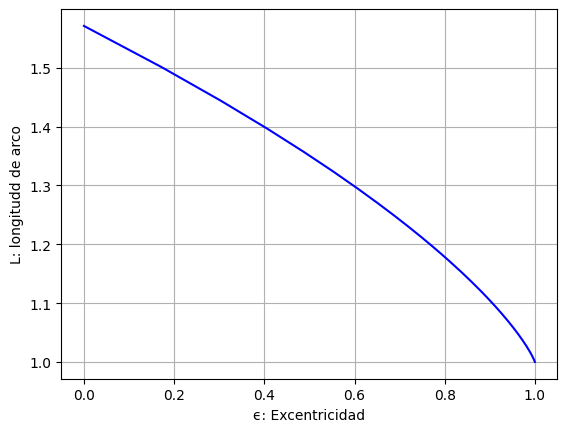

In [94]:
@np.vectorize
def L_k(k):

  g= lambda ϕ:np.sqrt(1-k*((np.sin(ϕ))**2))
  Lk =sc.integrate.quad(g,0,np.pi/2)
   
  return Lk[0]

L=L_k(k_sq)


# Grafica Longitud de arco  vs excentricidad

plt.plot(ϵ,L,color='blue')
plt.xlabel('ϵ: Excentricidad')
plt.ylabel('L: longitudd de arco')
plt.grid()


 

In [91]:
# Determinar la longitud de arco de la solucion del problema 1

a_1=(np.max(X)-np.min(X))/2
b_1=(np.max(Y)-np.min(Y))/2

ϵ_1 =(a_1**2 - b_1**2)/a_1**2  #Excentricidad de la orbita eliptica del problema 1.

L_1= L_k(ϵ_1)

print(f'La longitud de la elipse corresponiente a la orbita del planeta en el primer enunciado seria : L_1 = {L_1 }')


La longitud de la elipse corresponiente a la orbita del planeta en el primer enunciado seria : L_1 = 1.5274893180033537



### Matrices: Rotación  en el plano, autovalores y autovectores
3 (33%).   Considere la siguiente matrix de rotación:
\begin{bmatrix} 
\cos \theta & -\sin \theta\\ 
\sin \theta & \cos \theta
\end{bmatrix}

a) Encontrar el polinomio característico de A

b) Encontrar los autovalores y autovectores

c) construya la matriz diagonal con los autovalores y autovectores y compruebe su solución. 

Encontrar los autovalores y autovectores para $\theta=45$.

In [103]:
θ = np.deg2rad(45)
Rot=np.array([[np.cos(θ),-np.sin(θ)],[np.sin(θ),np.cos(θ)]])

Rot

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [ ]:
eigenvalues = tuple(linalg.eigvals(Rot))
charpol=(np.poly(eigenvalues))


In [120]:
eigenvects = (linalg.eig(Rot))[1]
eigenvects

array([[0.70710678+0.j        , 0.70710678-0.j        ],
       [0.        -0.70710678j, 0.        +0.70710678j]])